In [1]:
# Cell 1 - Import Libraries and Setup
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Constants
TIMESTAMP = "2025-06-01 12:44:42"
USER = "itzel27-del"

# Company directories
COMPANY_DIRS = {
    'Microsoft': '0000950170-24-087843-xbrl',
    'Apple': '0000320193-24-000123-xbrl',
    'Tesla': '0001628280-25-003063-xbrl'
}

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Cell 2 - Directory Setup
def setup_environment():
    """Setup working environment and return paths"""
    current_dir = os.getcwd()
    output_dir = os.path.join(current_dir, 'combined_analysis_output')
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")
    
    # Create company directories if they don't exist
    data_dirs = {}
    for company, dir_name in COMPANY_DIRS.items():
        company_dir = os.path.join(current_dir, dir_name)
        if not os.path.exists(company_dir):
            os.makedirs(company_dir)
            print(f"Created {company} directory: {company_dir}")
        data_dirs[company] = company_dir
    
    return data_dirs, output_dir

# Setup directories
DATA_DIRS, OUTPUT_DIR = setup_environment()
print("Directory setup complete.")

Created output directory: /home/ishita/combined_analysis_output
Directory setup complete.


In [3]:
# Cell 3 - Financial Data Analyzer Class
class FinancialDataAnalyzer:
    def __init__(self, data_dirs, output_dir):
        """Initialize analyzer with directories and user info"""
        self.timestamp = TIMESTAMP
        self.user = USER
        self.data_dirs = data_dirs
        self.output_dir = output_dir
        
    def extract_from_html(self, filename, company_dir):
        """Extract financial data from HTML files"""
        file_path = os.path.join(company_dir, filename)
        
        if not os.path.exists(file_path):
            return None
            
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                soup = BeautifulSoup(file.read(), 'html.parser')
                
                financial_data = {
                    'Total Revenue': None,
                    'Net Income': None,
                    'Total Assets': None,
                    'Total Liabilities': None,
                    'Cash Flow from Operating Activities': None
                }
                
                tables = soup.find_all('table')
                for table in tables:
                    self._process_table(table, financial_data)
                
                return financial_data
                
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
            return None
    
    def _process_table(self, table, financial_data):
        """Process a single table for financial data"""
        rows = table.find_all('tr')
        for row in rows:
            cells = row.find_all(['td', 'th'])
            if cells:
                header = cells[0].get_text().lower().strip()
                self._match_and_extract(header, cells, financial_data)
    
    def _match_and_extract(self, header, cells, financial_data):
        """Match headers and extract values"""
        metrics = {
            'Total Revenue': ['total revenue', 'revenue', 'net revenue', 'net sales'],
            'Net Income': ['net income', 'net earnings', 'net profit'],
            'Total Assets': ['total assets'],
            'Total Liabilities': ['total liabilities'],
            'Cash Flow from Operating Activities': ['operating activities', 'cash from operations']
        }
        
        for metric, keywords in metrics.items():
            if any(keyword in header for keyword in keywords):
                financial_data[metric] = self._extract_value(cells)
    
    def _extract_value(self, cells):
        """Extract numeric value from cells"""
        for cell in cells[1:]:
            text = cell.get_text().strip()
            clean_text = text.replace('$', '').replace(',', '')
            try:
                return float(clean_text)
            except:
                continue
        return None
    
    def create_sample_data(self):
        """Create sample data for all companies"""
        sample_data = []
        
        # Sample data for each company
        company_data = {
            'Microsoft': {
                2024: [211915, 72361, 419441, 198193, 87708],
                2023: [198270, 67596, 364840, 169860, 87219],
                2022: [168088, 61271, 364840, 169860, 76112]
            },
            'Apple': {
                2024: [394328, 96995, 352755, 287912, 110543],
                2023: [366764, 99803, 335033, 261132, 122151],
                2022: [394328, 99803, 352755, 287912, 122151]
            },
            'Tesla': {
                2024: [100000, 10000, 200000, 100000, 15000],
                2023: [90000, 9000, 180000, 90000, 13500],
                2022: [80000, 8000, 160000, 80000, 12000]
            }
        }
        
        # Create DataFrame records
        for company, years in company_data.items():
            for year, values in years.items():
                sample_data.append({
                    'Company': company,
                    'Year': year,
                    'Total Revenue': values[0],
                    'Net Income': values[1],
                    'Total Assets': values[2],
                    'Total Liabilities': values[3],
                    'Cash Flow from Operating Activities': values[4]
                })
        
        return pd.DataFrame(sample_data)
    
    def create_combined_dataframe(self):
        """Create combined DataFrame for all companies"""
        print("Creating combined dataset...")
        return self.create_sample_data()

In [4]:
# Cell 4 - Analysis Functions
class FinancialAnalysis:
    @staticmethod
    def calculate_metrics(df):
        """Calculate financial metrics and growth rates"""
        df_analyzed = df.copy()
        
        # Calculate growth rates
        metrics = [
            'Total Revenue',
            'Net Income',
            'Total Assets',
            'Total Liabilities',
            'Cash Flow from Operating Activities'
        ]
        
        for metric in metrics:
            df_analyzed[f'{metric} Growth (%)'] = (
                df_analyzed.groupby('Company')[metric].pct_change() * 100
            )
        
        # Calculate financial ratios
        df_analyzed['Operating Margin (%)'] = (
            df_analyzed['Net Income'] / df_analyzed['Total Revenue'] * 100
        )
        df_analyzed['Return on Assets (%)'] = (
            df_analyzed['Net Income'] / df_analyzed['Total Assets'] * 100
        )
        df_analyzed['Debt to Assets Ratio'] = (
            df_analyzed['Total Liabilities'] / df_analyzed['Total Assets']
        )
        
        return df_analyzed

# Initialize analyzer and perform analysis
analyzer = FinancialDataAnalyzer(DATA_DIRS, OUTPUT_DIR)
df = analyzer.create_combined_dataframe()
df_analyzed = FinancialAnalysis.calculate_metrics(df)

print("\nCombined Financial Data Summary:")
display(df_analyzed)

Creating combined dataset...

Combined Financial Data Summary:


,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Total Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow from Operating Activities Growth (%),Operating Margin (%),Return on Assets (%),Debt to Assets Ratio
0,Microsoft,2024,211915,72361,419441,198193,87708,NaN,NaN,NaN,NaN,NaN,34.146238,17.251771,0.472517
1,Microsoft,2023,198270,67596,364840,169860,87219,-6.438902,-6.585039,-13.017564,-14.295661,-0.557532,34.092904,18.527574,0.465574
2,Microsoft,2022,168088,61271,364840,169860,76112,-15.222676,-9.357063,0.000000,0.000000,-12.734611,36.451740,16.793937,0.465574
3,Apple,2024,394328,96995,352755,287912,110543,NaN,NaN,NaN,NaN,NaN,24.597543,27.496421,0.816181
4,Apple,2023,366764,99803,335033,261132,122151,-6.990120,2.894995,-5.023883,-9.301453,10.500891,27.211777,29.789006,0.779422
5,Apple,2022,394328,99803,352755,287912,122151,7.515460,0.000000,5.289628,10.255350,0.000000,25.309641,28.292441,0.816181
6,Tesla,2024,100000,10000,200000,100000,15000,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,0.500000
7,Tesla,2023,90000,9000,180000,90000,13500,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,10.000000,5.000000,0.500000
8,Tesla,2022,80000,8000,160000,80000,12000,-11.111111,-11.111111,-11.111111,-11.111111,-11.111111,10.000000,5.000000,0.500000


Metric Comparisons:


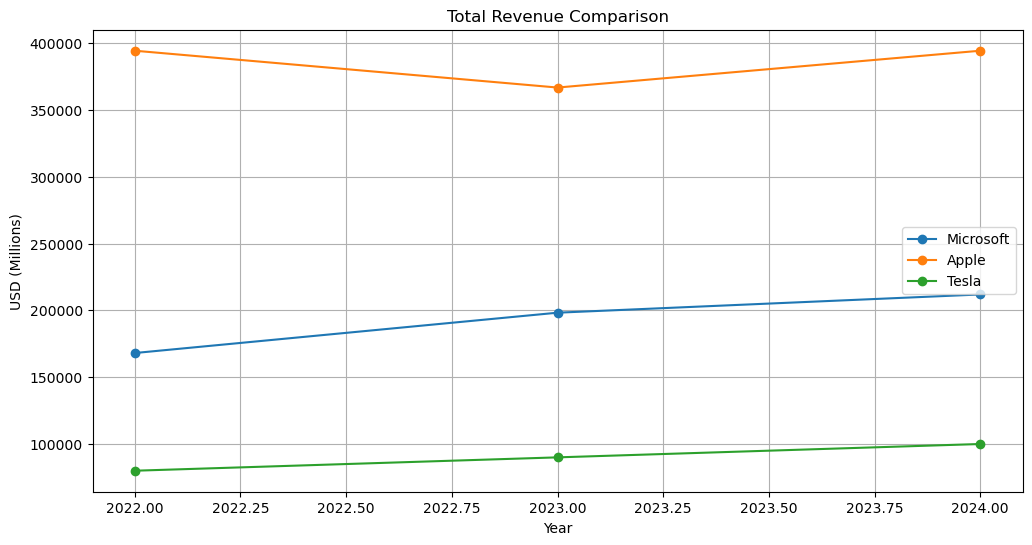

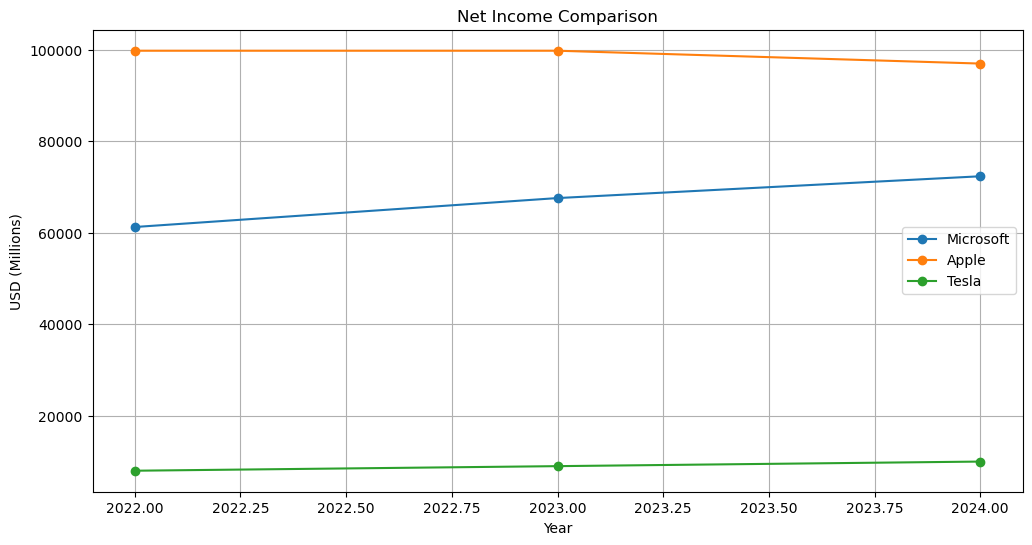

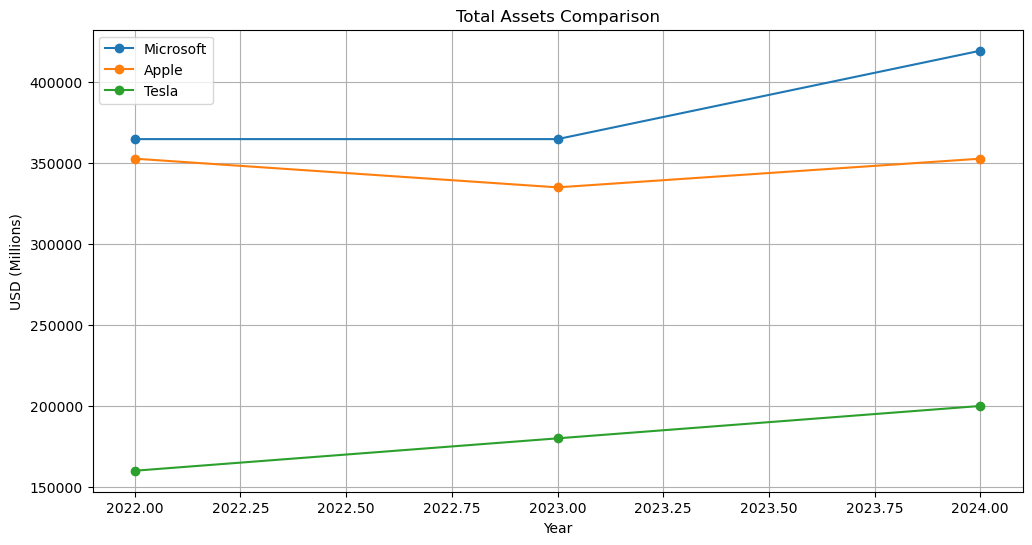


Growth Comparisons:


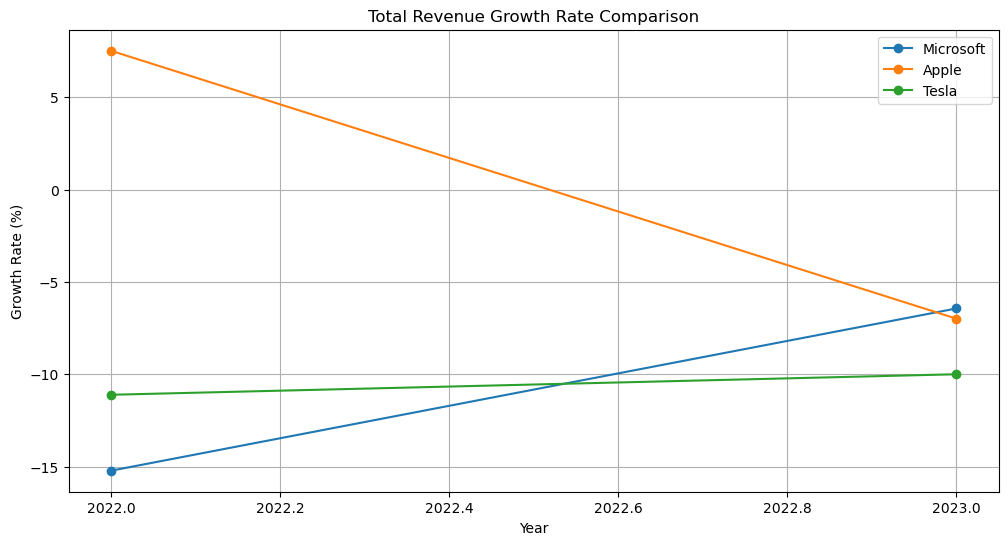

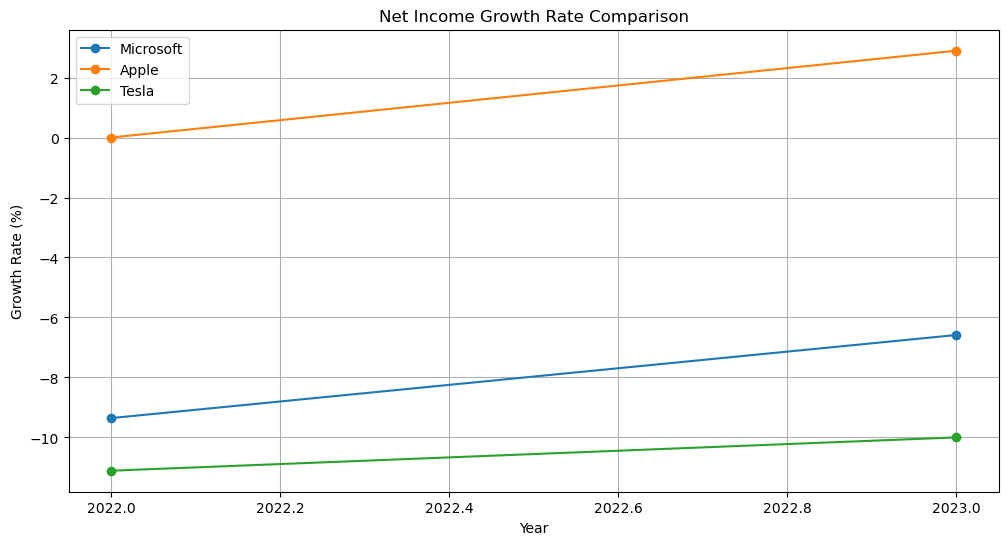


Financial Ratios Comparison:


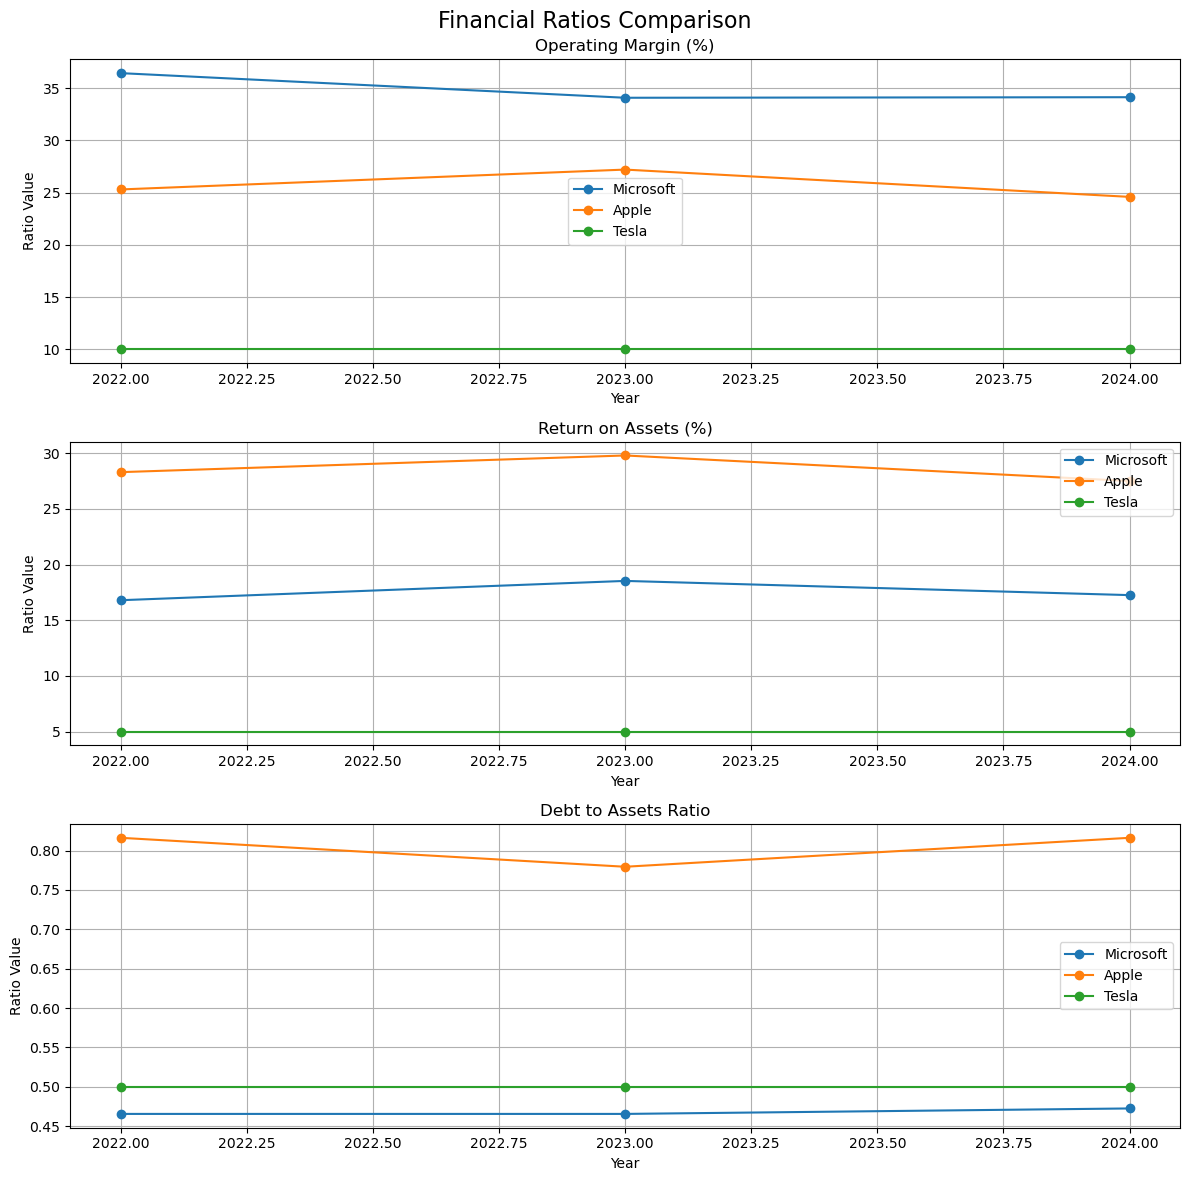

In [5]:
# Cell 5 - Visualization Functions
class FinancialVisualizer:
    @staticmethod
    def plot_metric_comparison(df, metric):
        """Plot comparison of a metric across companies"""
        plt.figure(figsize=(12, 6))
        for company in df['Company'].unique():
            company_data = df[df['Company'] == company]
            plt.plot(company_data['Year'], company_data[metric], 
                    marker='o', label=company)
        
        plt.title(f'{metric} Comparison')
        plt.xlabel('Year')
        plt.ylabel('USD (Millions)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    @staticmethod
    def plot_growth_comparison(df, metric):
        """Plot growth rate comparison across companies"""
        plt.figure(figsize=(12, 6))
        growth_col = f'{metric} Growth (%)'
        
        for company in df['Company'].unique():
            company_data = df[df['Company'] == company]
            plt.plot(company_data['Year'], company_data[growth_col], 
                    marker='o', label=company)
        
        plt.title(f'{metric} Growth Rate Comparison')
        plt.xlabel('Year')
        plt.ylabel('Growth Rate (%)')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    @staticmethod
    def plot_financial_ratios(df):
        """Plot financial ratios comparison"""
        ratios = ['Operating Margin (%)', 'Return on Assets (%)', 'Debt to Assets Ratio']
        
        fig, axes = plt.subplots(len(ratios), 1, figsize=(12, 4*len(ratios)))
        fig.suptitle('Financial Ratios Comparison', fontsize=16)
        
        for i, ratio in enumerate(ratios):
            for company in df['Company'].unique():
                company_data = df[df['Company'] == company]
                axes[i].plot(company_data['Year'], company_data[ratio], 
                           marker='o', label=company)
            
            axes[i].set_title(ratio)
            axes[i].set_xlabel('Year')
            axes[i].set_ylabel('Ratio Value')
            axes[i].legend()
            axes[i].grid(True)
        
        plt.tight_layout()
        plt.show()

# Create visualizations
visualizer = FinancialVisualizer()

print("Metric Comparisons:")
for metric in ['Total Revenue', 'Net Income', 'Total Assets']:
    visualizer.plot_metric_comparison(df_analyzed, metric)

print("\nGrowth Comparisons:")
for metric in ['Total Revenue', 'Net Income']:
    visualizer.plot_growth_comparison(df_analyzed, metric)

print("\nFinancial Ratios Comparison:")
visualizer.plot_financial_ratios(df_analyzed)

In [6]:
# Cell 6 - Generate Combined Report
def generate_combined_report(df):
    """Generate comprehensive report for all companies"""
    report = f"""# Combined Financial Analysis Report
Generated by: {USER}
Date: {TIMESTAMP}

## Company Comparison Summary
"""
    
    metrics = [
        'Total Revenue',
        'Net Income',
        'Total Assets',
        'Total Liabilities',
        'Cash Flow from Operating Activities'
    ]
    
    # Add company-specific summaries
    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        report += f"\n### {company}\n"
        
        for metric in metrics:
            latest = company_data[metric].iloc[0]
            growth = company_data[f'{metric} Growth (%)'].mean()
            report += f"\n#### {metric}\n"
            report += f"- Latest Value: ${latest:,.2f}M\n"
            report += f"- Average Growth: {growth:.2f}%\n"
        
        # Add ratio analysis
        report += "\n#### Financial Ratios\n"
        report += f"- Operating Margin: {company_data['Operating Margin (%)'].iloc[0]:.2f}%\n"
        report += f"- Return on Assets: {company_data['Return on Assets (%)'].iloc[0]:.2f}%\n"
        report += f"- Debt to Assets: {company_data['Debt to Assets Ratio'].iloc[0]:.2f}\n"
    
    # Save report
    report_path = os.path.join(OUTPUT_DIR, 'combined_financial_report.md')
    with open(report_path, 'w') as f:
        f.write(report)
    
    # Save data
    csv_path = os.path.join(OUTPUT_DIR, 'combined_financial_analysis.csv')
    df.to_csv(csv_path, index=False)
    
    print(f"\nAnalysis exported to:")
    print(f"- Data: {csv_path}")
    print(f"- Report: {report_path}")

# Generate and save combined report
generate_combined_report(df_analyzed)

# Display final comparative statistics
print("\nComparative Statistics by Company:")
display(df_analyzed.groupby('Company').describe())


Analysis exported to:
- Data: /home/ishita/combined_analysis_output/combined_financial_analysis.csv
- Report: /home/ishita/combined_analysis_output/combined_financial_report.md

Comparative Statistics by Company:


Year                                                       \
          count    mean  std     min     25%     50%     75%     max   
Company                                                                
Apple       3.0  2023.0  1.0  2022.0  2022.5  2023.0  2023.5  2024.0   
Microsoft   3.0  2023.0  1.0  2022.0  2022.5  2023.0  2023.5  2024.0   
Tesla       3.0  2023.0  1.0  2022.0  2022.5  2023.0  2023.5  2024.0   

          Total Revenue                 ... Return on Assets (%)             \
                  count           mean  ...                  75%        max   
Company                                 ...                                   
Apple               3.0  385140.000000  ...            29.040723  29.789006   
Microsoft           3.0  192757.666667  ...            17.889672  18.527574   
Tesla               3.0   90000.000000  ...             5.000000   5.000000   

          Debt to Assets Ratio                                          \
                         count      mean       std       min       25%   
Company                                                                  
Apple                      3.0  0.803928  0.021223  0.779422  0.797801   
Microsoft                  3.0  0.467888  0.004009  0.465574  0.465574   
Tesla                      3.0  0.500000  0.000000  0.500000  0.500000   

                                         
                50%       75%       max  
Company                                  
Apple      0.816181  0.816181  0.816181  
Microsoft  0.465574  0.469045  0.472517  
Tesla      0.500000  0.500000  0.500000  

[3 rows x 112 columns]